<a href="https://colab.research.google.com/github/IngerMasha/week12/blob/main/Mini_Project_Advanced_Statistical_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data_url = '/content/AAPL, 1D 01012007-12072023.csv'
df = pd.read_csv(data_url)

print(df.info())
print(df.isnull().sum())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB
None
volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64
         volume    vwap    open   close    high     low        time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250  1167800400   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936  1167886800   
2  8.352580e+08  3.0426  3.0632  3.03

In [2]:
df['Date'] = pd.to_datetime(df['time'], unit='s')
df.set_index('Date', inplace=True)
df.drop(columns=['time'], inplace=True)
print(df.head())

                           volume    vwap    open   close    high     low  \
Date                                                                        
2007-01-03 05:00:00  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250   
2007-01-04 05:00:00  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936   
2007-01-05 05:00:00  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143   
2007-01-08 05:00:00  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457   
2007-01-09 05:00:00  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411   

                     transactions  
Date                               
2007-01-03 05:00:00        189737  
2007-01-04 05:00:00        136333  
2007-01-05 05:00:00        141050  
2007-01-08 05:00:00        130547  
2007-01-09 05:00:00        569578  


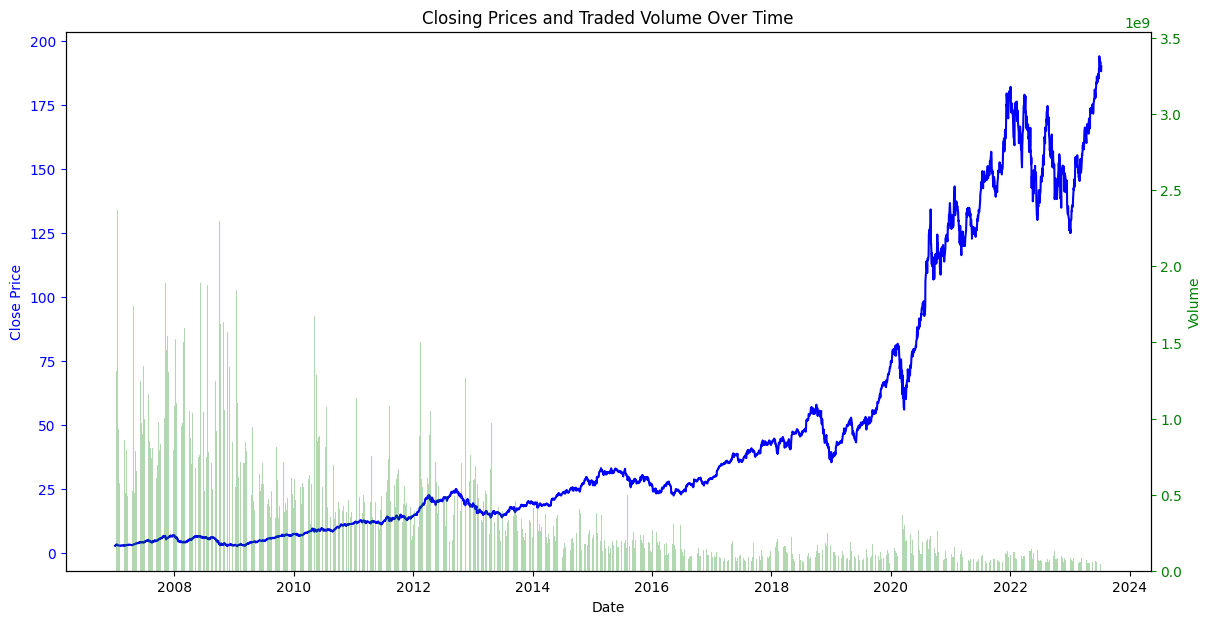

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(df.index, df['close'], 'b-', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.bar(df.index, df['volume'], color='g', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='g')
ax2.tick_params('y', colors='g')

plt.title('Closing Prices and Traded Volume Over Time')
plt.show()


In [11]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['open'],
                                     high=df['high'],
                                     low=df['low'],
                                     close=df['close'])])

fig.update_layout(title='Candlestick Chart of AAPL Stock',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

In [14]:
summary_stats = df[['close', 'volume']].agg(['mean', 'median', 'std'])
print('Summary Statistics:\n', summary_stats)


Summary Statistics:
             close        volume
mean    46.396058  3.662925e+08
median  25.825000  2.136463e+08
std     50.293482  3.724793e+08


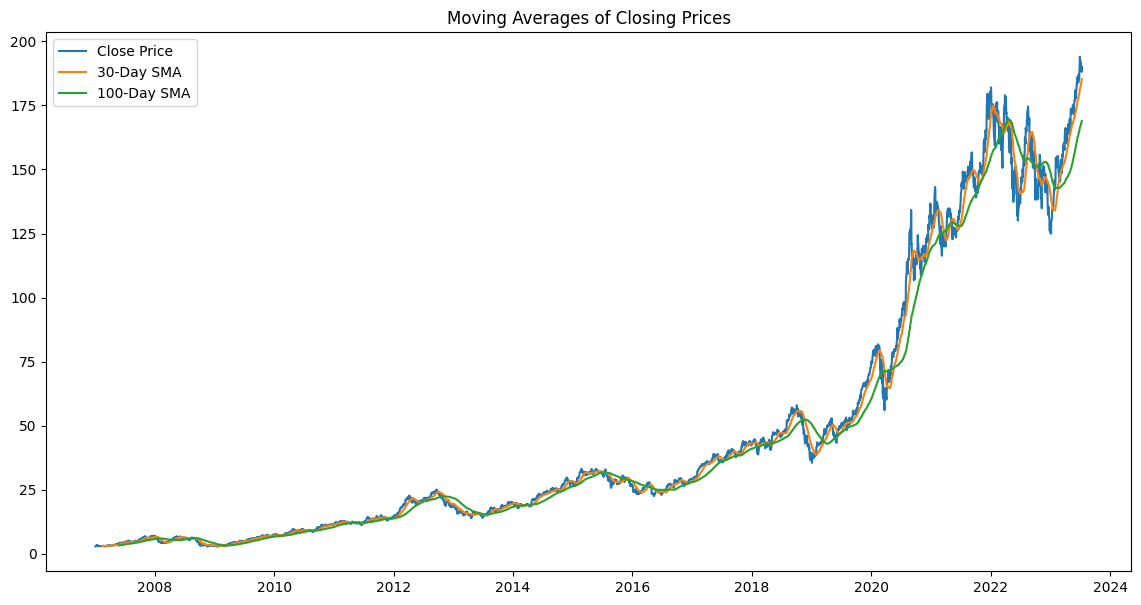

In [15]:
df['SMA_30'] = df['close'].rolling(window=30).mean()
df['SMA_100'] = df['close'].rolling(window=100).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price')
plt.plot(df.index, df['SMA_30'], label='30-Day SMA')
plt.plot(df.index, df['SMA_100'], label='100-Day SMA')
plt.title('Moving Averages of Closing Prices')
plt.legend()
plt.show()


In [16]:
from scipy.stats import ttest_ind

df_2022 = df[df.index.year == 2022]['close']
df_2023 = df[df.index.year == 2023]['close']

t_stat, p_value = ttest_ind(df_2022, df_2023)
print(f'T-test Statistic: {t_stat}')
print(f'P-value: {p_value}')


T-test Statistic: -4.864232434086166
P-value: 1.685936837260292e-06


In [17]:
from scipy.stats import normaltest

df['daily_return'] = df['close'].pct_change()

stat, p_value = normaltest(df['daily_return'].dropna())
print(f'Normality Test Statistic: {stat}')
print(f'P-value: {p_value}')


Normality Test Statistic: 535.5862106742969
P-value: 4.999563172686955e-117


Summary and Conclusions

Data Exploration:
The data is well structured, with no missing values. Date and time format conversion makes the data easy to work with and provides a readable time series.
Visualization:

Clear trends in closing prices and volumes; candlestick charts offer detailed information on price action.
Statistical Analysis:
Summary statistics reveal key characteristics; moving averages highlight trends.
Hypothesis Testing:
The results of the t-test and normality test provide insight into price behavior and return distribution.
The p-value (1.685936837260292e-06) is significantly less than 0.05, which means that the means of the compared samples are statistically significantly different from each other. Thus, we can say with a high degree of confidence that there is a significant difference between the means of the two samples. The result of the normality test suggests that the data deviates significantly from the normal distribution. The t-test showed that the means of the two samples were significantly different from each other.
The normality test showed that the data were not normally distributed, which could affect the interpretation of the t-test results. In this case, it may be worth considering using alternative data analysis methods to confirm the conclusions.

Reflections

Challenges:
Handled large data sets whose data were not normally distributed and performed complex statistical analysis.
Solutions:
Used efficient data processing methods and applied appropriate statistical techniques for accurate analytics.